# <span style='font-family:Georgia'> ETL Pipeline for Sales Order Data</span>


#### <div style="text-align: right"> Last Updated: 03/31/2021 </div>

### <span style='font-family:serif'> This project contains the ETL (Extract-Tranform-Load) Pipeline performed on two Tables (SO_Master and SO_Detail) from *ExactMaxCaseMedical* database containing sales data.  <br><br>The data is taken from year 2014 onwards. </br></br></span>

### Importing Required Libraries

In [1]:
import pyodbc
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt

## EXTRACTION

### SQL Database Connection

In [2]:
pyodbc.drivers() #To check which all drivers are available

['SQL Server',
 'ODBC Driver 17 for SQL Server',
 'SQL Server Native Client 11.0',
 'SQL Server Native Client RDA 11.0',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)']

In [3]:
connection = pyodbc.connect(
    "Driver={ODBC Driver 17 for SQL Server}; Server=SQLSERVERTEST;Database=ExactMAXCaseMedical;uid=sa;pwd=Twotbgrar2020!"
        )
print(connection)

### Taking data from 2014 onwards

Selecting the required columns and Joining the two tables (So_Detail and So_Master) using the LEFT join based ON Order Numbers

In [4]:
sql_query='''
SELECT d.ORDNUM_28,
       d.LINNUM_28,
       d.DELNUM_28,
       d. PRTNUM_28,
       d.CUSTID_28,
       m.CUSTID_27,
       d.CURDUE_28,
       d. PRICE_28,
       d.ORGQTY_28,
       d.CURQTY_28,
       d.CreationDate,
       d.SHPQTY_28,
       d.SLSREP_28,
       m.NAME_27,
       m.ADDR1_27,
       m.ADDR2_27,
       m.CITY_27,
       m.STATE_27,
       m.ZIPCD_27,
       m.CNTRY_27,
       CONCAT(MONTH(d.CreationDate), '-', YEAR(d.CreationDate)) AS Date 
FROM [ExactMAXCaseMedical].[dbo].[SO_Detail] d
LEFT JOIN [ExactMAXCaseMedical].[dbo].[SO_Master] m
ON d.ORDNUM_28 = m.ORDNUM_27
WHERE YEAR(d.CreationDate) > 2013; 
'''

In [5]:
df= pd.read_sql(sql_query, connection)

In [6]:
df.head()

,ORDNUM_28,LINNUM_28,DELNUM_28,PRTNUM_28,CUSTID_28,CUSTID_27,CURDUE_28,PRICE_28,ORGQTY_28,CURQTY_28,...,SHPQTY_28,SLSREP_28,NAME_27,ADDR1_27,ADDR2_27,CITY_27,STATE_27,ZIPCD_27,CNTRY_27,Date
0,20088593,01,01,SC02NG,VAME053,VAME053,2014-01-02,277.39,7.0,7.0,...,7.0,VW331,VA Medical Center ...,Attn: Rcv Dept. ...,1601 S.W. Archer Road ...,Gainesville,FL,32608,US,1-2014
1,20088593,02,01,STN1,VAME053,VAME053,2014-01-02,57.28,7.0,7.0,...,7.0,VW331,VA Medical Center ...,Attn: Rcv Dept. ...,1601 S.W. Archer Road ...,Gainesville,FL,32608,US,1-2014
2,20088593,03,01,SCPLQ4C,VAME053,VAME053,2014-01-02,7.00,7.0,7.0,...,7.0,VW331,VA Medical Center ...,Attn: Rcv Dept. ...,1601 S.W. Archer Road ...,Gainesville,FL,32608,US,1-2014
3,20088593,04,01,BES002,VAME053,VAME053,2014-03-11,10.87,14.0,14.0,...,14.0,VW331,VA Medical Center ...,Attn: Rcv Dept. ...,1601 S.W. Archer Road ...,Gainesville,FL,32608,US,1-2014
4,20088593,05,01,POST01,VAME053,VAME053,2014-01-16,3.80,35.0,35.0,...,35.0,VW331,VA Medical Center ...,Attn: Rcv Dept. ...,1601 S.W. Archer Road ...,Gainesville,FL,32608,US,1-2014


In [7]:
df.shape

(220230, 21)

## DATA CLEANING

In [8]:
# Removing Leading and Lagging White Spaces from column values

df['PRTNUM_28']= df['PRTNUM_28'].str.strip()
df['CUSTID_28']= df['CUSTID_28'].str.strip()
df['CUSTID_27']= df['CUSTID_27'].str.strip()
df['NAME_27']= df['NAME_27'].str.strip()
df['ADDR1_27']= df['ADDR1_27'].str.strip()
df['ADDR2_27']= df['ADDR2_27'].str.strip()
df['CITY_27']= df['CITY_27'].str.strip()
df['STATE_27']= df['STATE_27'].str.strip()
df['ZIPCD_27']= df['ZIPCD_27'].str.strip()
df['CNTRY_27']= df['CNTRY_27'].str.strip()

In [9]:
def summary(df, pred=None):
  obs = df.shape[0]
  types = df.dtypes
  counts = df.apply(lambda x: x.count())
  min = df.min()
  uniques = df.apply(lambda x: x.unique().shape[0])
  nulls = df.apply(lambda x: x.isnull().sum())
  print('Data shape:', df.shape)

  if pred is None:
        cols = ['types', 'counts', 'uniques', 'nulls', 'min']
        str = pd.concat([types, counts, uniques, nulls, min], axis = 1, sort=True)

  str.columns = cols
  dtypes = str.types.value_counts()
  print('___________________________\nData types:')
  print(str.types.value_counts())
  print('___________________________')
  return str

details = summary(df)
display(details.sort_values(by='nulls', ascending=False))

Data shape: (220230, 21)
___________________________
Data types:
object            15
float64            4
datetime64[ns]     2
Name: types, dtype: int64
___________________________


,types,counts,uniques,nulls,min
ADDR1_27,object,220230,7410,0,
LINNUM_28,object,220230,106,0,01
STATE_27,object,220230,151,0,
SLSREP_28,object,220230,32,0,
SHPQTY_28,float64,220230,432,0,0
PRTNUM_28,object,220230,3975,0,+
PRICE_28,float64,220230,8424,0,0
ORGQTY_28,float64,220230,502,0,0.01
ORDNUM_28,object,220230,90974,0,20088593
NAME_27,object,220230,7821,0,


In [10]:
df[df['STATE_27'] == ''].index

Int64Index([   268,    269,    270,    324,    879,   1562,   1563,   1564,
              2145,   2146,
            ...
            218851, 218852, 218853, 218854, 218855, 218856, 220024, 220025,
            220026, 220027],
           dtype='int64', length=1903)

From the above you can see there are no null values, but in columns like CNTRY_27,ZIPCD_27,CITY_27 etc contains empty string values which didn't get detected.
So, we will replace the blank (' ') values with the NaN values.

In [11]:
 df.replace('', np.nan, inplace=True) 

In [12]:
def summary(df, pred=None):
  obs = df.shape[0]
  types = df.dtypes
  counts = df.apply(lambda x: x.count())
  min = df.min()
  uniques = df.apply(lambda x: x.unique().shape[0])
  nulls = df.apply(lambda x: x.isnull().sum())
  print('Data shape:', df.shape)

  if pred is None:
        cols = ['types', 'counts', 'uniques', 'nulls', 'min']
        str = pd.concat([types, counts, uniques, nulls, min], axis = 1, sort=True)

  str.columns = cols
  dtypes = str.types.value_counts()
  print('___________________________\nData types:')
  print(str.types.value_counts())
  print('___________________________')
  return str

details = summary(df)
display(details.sort_values(by='nulls', ascending=False))

Data shape: (220230, 21)
___________________________
Data types:
object            15
float64            4
datetime64[ns]     2
Name: types, dtype: int64
___________________________


,types,counts,uniques,nulls,min
ADDR2_27,object,184481,6389,35749,NaN
ADDR1_27,object,210629,7410,9601,NaN
CNTRY_27,object,215329,93,4901,NaN
STATE_27,object,218327,151,1903,NaN
ZIPCD_27,object,218936,3914,1294,NaN
CITY_27,object,219895,2548,335,NaN
NAME_27,object,220195,7821,35,NaN
CURQTY_28,float64,220230,492,0,0.01
CUSTID_27,object,220230,5752,0,1205904
CUSTID_28,object,220230,5753,0,1205904


Now, we can see that there are many null values, these are mainly columns containing string values.

In [13]:
#Plotting Date vs Number of Orders graph

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Orders', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

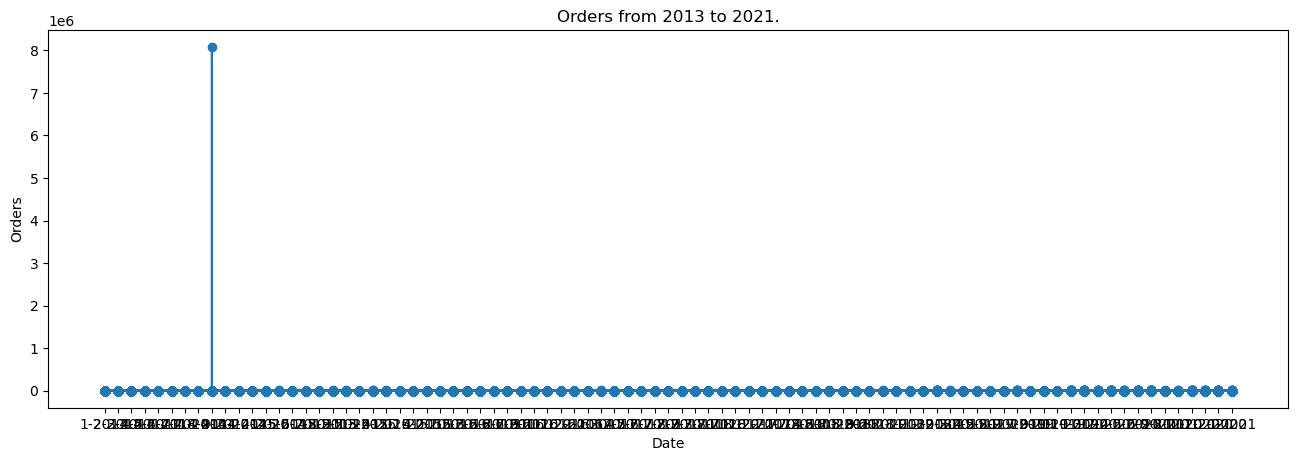

In [14]:
plot_df(df, x=df.Date, y=df.CURQTY_28,title='Orders from 2013 to 2021.')

looks there is some records which is very high comapred to other value in CURQTY_28

In [15]:
df.describe()

,PRICE_28,ORGQTY_28,CURQTY_28,SHPQTY_28
count,220230.000000,2.202300e+05,2.202300e+05,220230.000000
mean,181.635297,1.398383e+02,4.574657e+01,6.163015
std,973.193355,3.568309e+04,1.720111e+04,133.149856
min,0.000000,1.000000e-02,1.000000e-02,0.000000
25%,48.730000,1.000000e+00,1.000000e+00,0.000000
50%,83.530000,2.000000e+00,2.000000e+00,1.000000
75%,211.200000,4.000000e+00,5.000000e+00,2.000000
max,251100.000000,1.097566e+07,8.072014e+06,11000.000000


 As you see all the values are extremely small. Which means there is something wrong

In [16]:
df['CURQTY_28'].max()

8072014.0

In [17]:
df.loc[df['CURQTY_28'] == 8072014.0]

,ORDNUM_28,LINNUM_28,DELNUM_28,PRTNUM_28,CUSTID_28,CUSTID_27,CURDUE_28,PRICE_28,ORGQTY_28,CURQTY_28,...,SHPQTY_28,SLSREP_28,NAME_27,ADDR1_27,ADDR2_27,CITY_27,STATE_27,ZIPCD_27,CNTRY_27,Date
143875,90007705,01,02,+,SARA001,SARA001,2014-12-30,0.0,8072014.0,8072014.0,...,0.0,999,Sarasota Memorial Hospital,Attn:Receiving Department,1700 S. Tamiami Trail,Sarasota,FL,34239,US,8-2014


As you can see this record is definitely an error. 8072014 is actually a date (if you observe closely). This is most likely a Data entry error

<AxesSubplot:xlabel='CURQTY_28'>

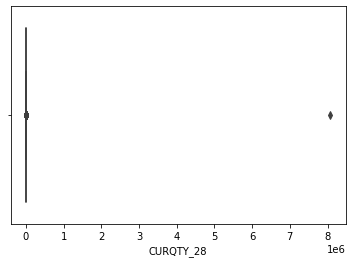

In [18]:
sns.boxplot(x=df['CURQTY_28'])

In [19]:
#Removing the record from our data
df=df[df.CURQTY_28 != 8072014.0]

In [20]:
df.loc[df['CURQTY_28'] >10000]

,ORDNUM_28,LINNUM_28,DELNUM_28,PRTNUM_28,CUSTID_28,CUSTID_27,CURDUE_28,PRICE_28,ORGQTY_28,CURQTY_28,...,SHPQTY_28,SLSREP_28,NAME_27,ADDR1_27,ADDR2_27,CITY_27,STATE_27,ZIPCD_27,CNTRY_27,Date
131920,20161937,01,01,SCPOST01,STANDAR,STANDAR,2020-10-02,0.0,11000.0,11000.0,...,11000.0,,STANDAR INC.,374 Norh Midland Avenue,NaN,Saddle Brook,NJ,07663,US,10-2020


In [19]:
df.describe()

,PRICE_28,ORGQTY_28,CURQTY_28,SHPQTY_28
count,220229.000000,2.202290e+05,220229.000000,220229.000000
mean,181.636122,1.031861e+02,9.093958,6.163043
std,973.195487,3.126395e+04,134.585261,133.150158
min,0.000000,1.000000e-02,0.010000,0.000000
25%,48.730000,1.000000e+00,1.000000,0.000000
50%,83.530000,2.000000e+00,2.000000,1.000000
75%,211.200000,4.000000e+00,5.000000,2.000000
max,251100.000000,1.097566e+07,11000.000000,11000.000000


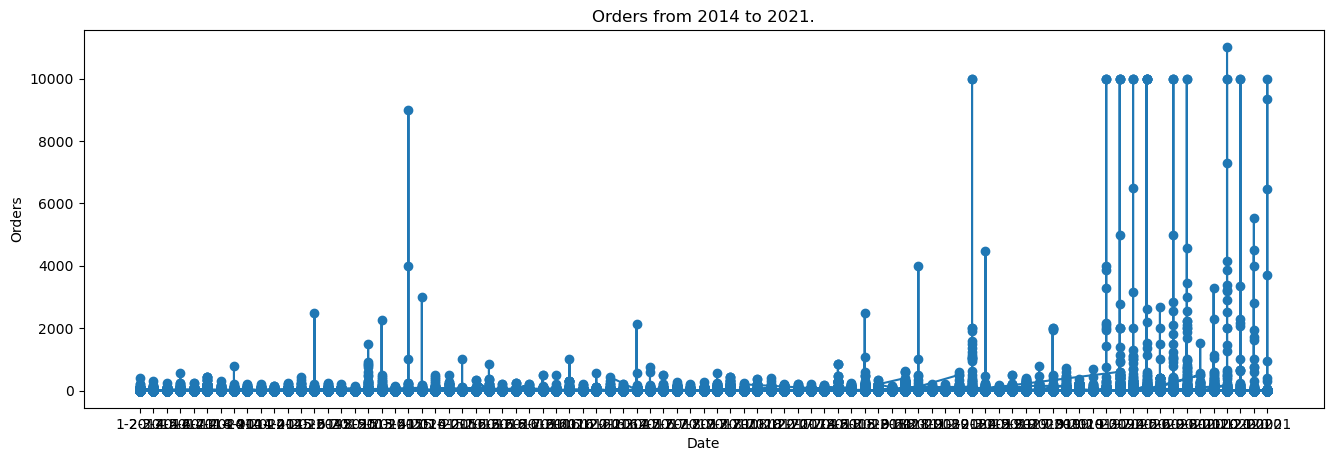

In [20]:
plot_df(df, x=df.Date, y=df.CURQTY_28,title='Orders from 2014 to 2021.')

In [48]:
df.head()

,ORDNUM_28,LINNUM_28,DELNUM_28,PRTNUM_28,CUSTID_28,CUSTID_27,CURDUE_28,PRICE_28,ORGQTY_28,CURQTY_28,...,SHPQTY_28,SLSREP_28,NAME_27,ADDR1_27,ADDR2_27,CITY_27,STATE_27,ZIPCD_27,CNTRY_27,Date
0,20088593,01,01,SC02NG,VAME053,VAME053,2014-01-02,277.39,7.0,7.0,...,7.0,VW331,VA Medical Center,Attn: Rcv Dept.,1601 S.W. Archer Road,Gainesville,FL,32608,US,1-2014
1,20088593,02,01,STN1,VAME053,VAME053,2014-01-02,57.28,7.0,7.0,...,7.0,VW331,VA Medical Center,Attn: Rcv Dept.,1601 S.W. Archer Road,Gainesville,FL,32608,US,1-2014
2,20088593,03,01,SCPLQ4C,VAME053,VAME053,2014-01-02,7.00,7.0,7.0,...,7.0,VW331,VA Medical Center,Attn: Rcv Dept.,1601 S.W. Archer Road,Gainesville,FL,32608,US,1-2014
3,20088593,04,01,BES002,VAME053,VAME053,2014-03-11,10.87,14.0,14.0,...,14.0,VW331,VA Medical Center,Attn: Rcv Dept.,1601 S.W. Archer Road,Gainesville,FL,32608,US,1-2014
4,20088593,05,01,POST01,VAME053,VAME053,2014-01-16,3.80,35.0,35.0,...,35.0,VW331,VA Medical Center,Attn: Rcv Dept.,1601 S.W. Archer Road,Gainesville,FL,32608,US,1-2014


In [31]:
df_orders['Date']=pd.to_datetime(df_orders['Date'])

<ipython-input-31-a33f74eae556>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
df_agg.head()

,Date,Orders,Year,Month
0,2014-01-01,13088.41,2014,Jan
1,2014-02-01,12148.00,2014,Feb
2,2014-03-01,10599.50,2014,Mar
3,2014-04-01,14188.58,2014,Apr
4,2014-05-01,12578.00,2014,May


In [49]:
df['InvoiceDate'] = pd.to_datetime(df['CreationDate'])

df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)

df['Revenue'] = df['PRICE_28'] * df['CURQTY_28']

df['Revenue']=df['Revenue'].round(decimals=3)

In [50]:
df=df.drop(['Date','CreationDate'], axis=1)

In [56]:
df_min_purchase= df.groupby('CUSTID_28').InvoiceDate.min().reset_index()
df_min_purchase.columns=['CUSTID_28', 'MinPurchaseDate']
df_min_purchase['MinPurchaseYearMonth'] = df_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

In [57]:
#merge first purchase date column to our main df
df = pd.merge(df, df_min_purchase,on='CUSTID_28')

Now, we create a new column **UserType** in which we will define whether a customer is New or Existing?

If the customer's First Purchase Year Month is before the selected Invoice Year Month then it's 'Existing' else it will be considered as 'New'

In [58]:
#UserType column
df['UserType'] = 'New'
df.loc[df['InvoiceYearMonth']>df['MinPurchaseYearMonth'],'UserType'] = 'Existing'

In [59]:
df.head()

,ORDNUM_28,LINNUM_28,DELNUM_28,PRTNUM_28,CUSTID_28,CUSTID_27,CURDUE_28,PRICE_28,ORGQTY_28,CURQTY_28,...,CITY_27,STATE_27,ZIPCD_27,CNTRY_27,InvoiceDate,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,20088593,01,01,SC02NG,VAME053,VAME053,2014-01-02,277.39,7.0,7.0,...,Gainesville,FL,32608,US,2014-01-02 10:11:36.253,201401,1941.73,2014-01-02 10:11:36.253,201401,New
1,20088593,02,01,STN1,VAME053,VAME053,2014-01-02,57.28,7.0,7.0,...,Gainesville,FL,32608,US,2014-01-02 10:11:49.277,201401,400.96,2014-01-02 10:11:36.253,201401,New
2,20088593,03,01,SCPLQ4C,VAME053,VAME053,2014-01-02,7.00,7.0,7.0,...,Gainesville,FL,32608,US,2014-01-02 10:12:13.373,201401,49.00,2014-01-02 10:11:36.253,201401,New
3,20088593,04,01,BES002,VAME053,VAME053,2014-03-11,10.87,14.0,14.0,...,Gainesville,FL,32608,US,2014-01-02 10:12:39.600,201401,152.18,2014-01-02 10:11:36.253,201401,New
4,20088593,05,01,POST01,VAME053,VAME053,2014-01-16,3.80,35.0,35.0,...,Gainesville,FL,32608,US,2014-01-02 10:12:59.010,201401,133.00,2014-01-02 10:11:36.253,201401,New


In [61]:
df.shape

(220229, 25)

In [ ]:
# Extarcting the DataFrame (df) to csv file, for reference.
df.to_csv("sales_order_cleaned.csv")